In [1]:
!pip install wget

In [2]:
#spacy
import pandas as pd
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc
from sklearn import tree
import itertools 
import pickle
#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np


#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#transformers
from transformers import *
model_name = "bert-base-uncased"
from transformers import DataCollatorForTokenClassification



#warning


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\debug\cli\debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future vers

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import wget
import locale
import en_core_web_sm
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.utils import plot_model
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc
import gensim
from gensim import corpora
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px


In [4]:
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
df = pd.read_csv("./UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [6]:
df.shape

(962, 2)

In [7]:
df.info()
missing_values = df.isnull().sum()
print("les valeurs manquantes :\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
les valeurs manquantes :
 Category    0
Resume      0
dtype: int64


In [8]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [9]:
print("Total number of available jobs:", df.Category.nunique())

Total number of available jobs: 25


In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

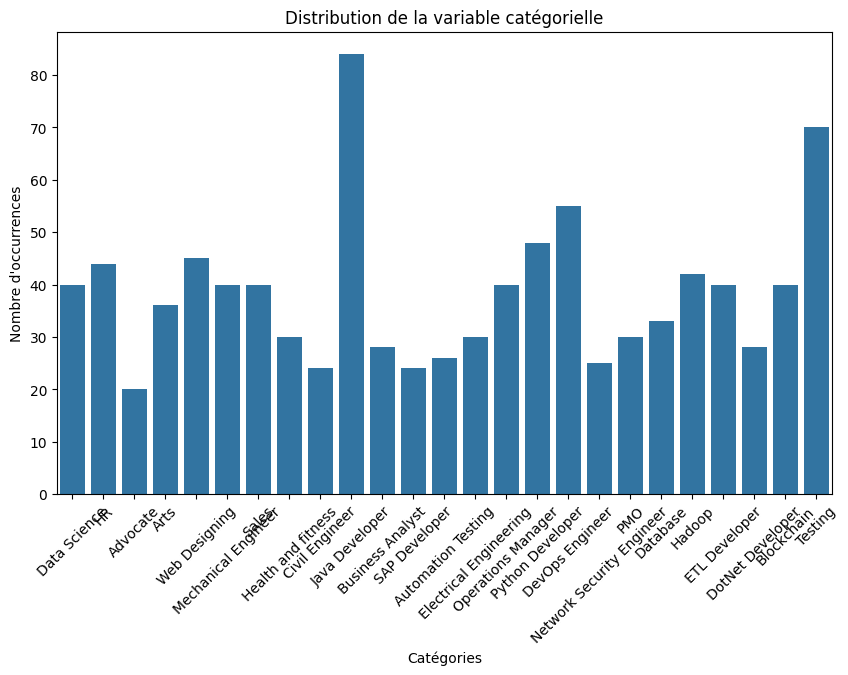

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution de la variable catégorielle')
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

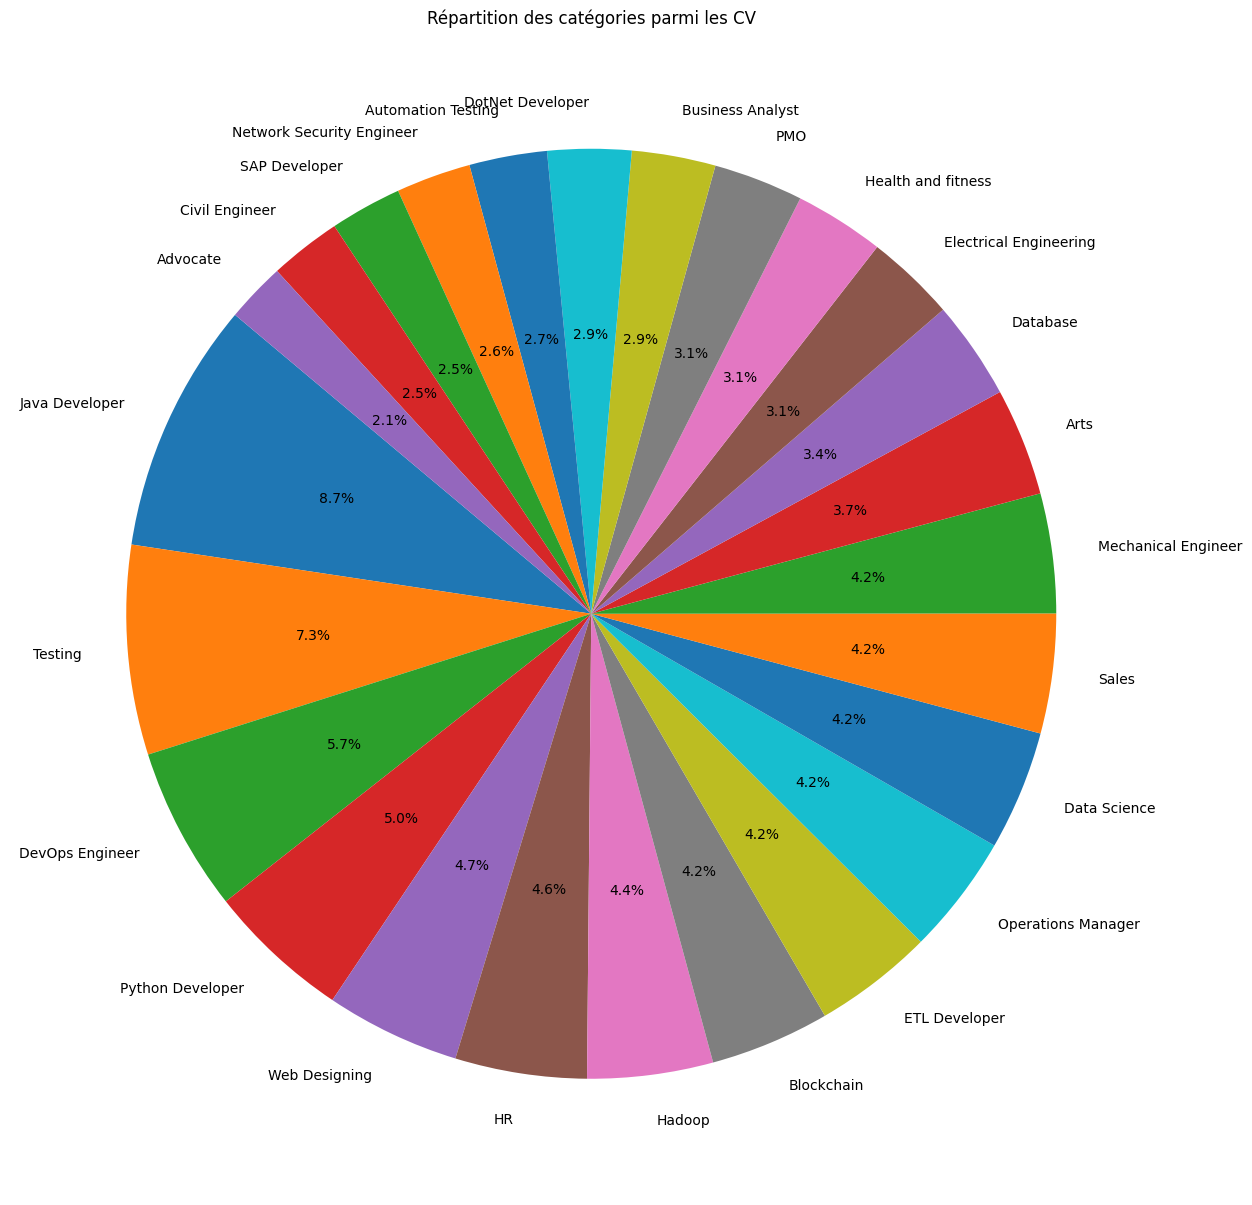

In [12]:
# Création d'un graphique en secteurs
plt.figure(figsize=(15, 20))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Répartition des catégories parmi les CV')
plt.ylabel('')

# Affichage du graphique
plt.show()

C:\Users\yassi\AppData\Local\Temp\ipykernel_23064\3106966570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.resume_len);


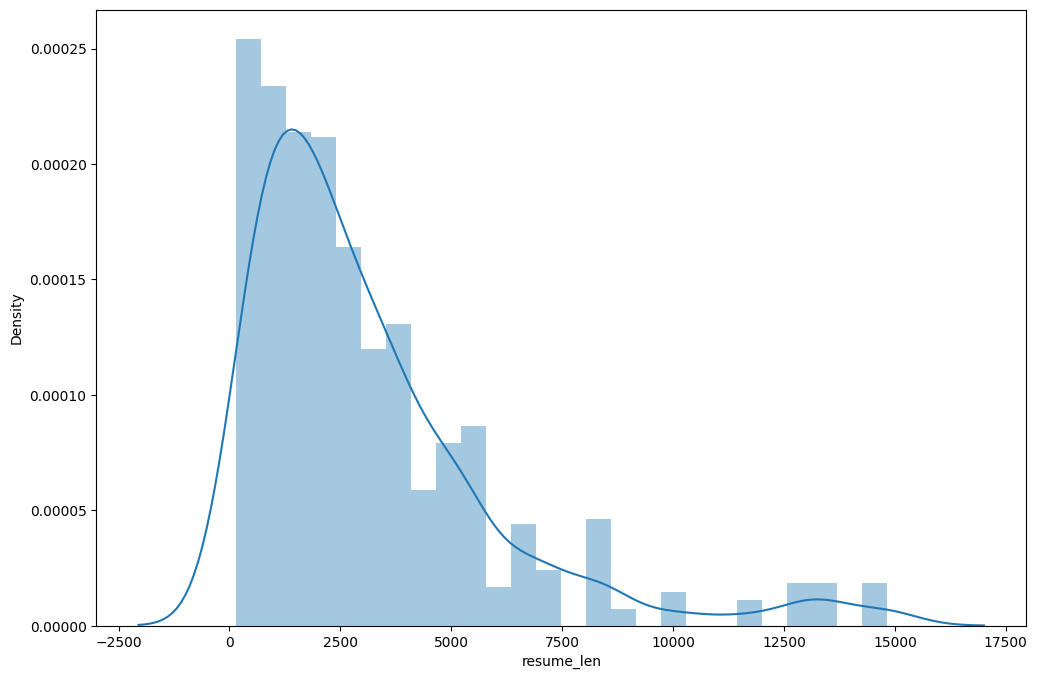

In [13]:
df['resume_len'] = df.Resume.apply(len)
sns.distplot(df.resume_len);

modification de data set add skils


In [14]:

nlp = en_core_web_sm.load()
skill_pattern_path = r".\\jz_skill_patterns.jsonl"
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names


def get_skills(text):
    doc = nlp(text)
    #print(doc)
    myset = []
    subset = []
    for ent in doc.ents:
        #print("1")
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    #print(subset)
    return subset
def unique_skills(x):
    return list(set(x))

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding



In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords
clean = []
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

for review in df["Resume"]:
    # Remove special characters, URLs, and Twitter handles
    review = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"', " ", review)
    # Convert to lowercase and split into words
    review = review.lower().split()
    # Lemmatize words and remove stop words
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
    # Join the words back into a single string
    review = " ".join(review)
    clean.append(review)

<>:9: DeprecationWarning: invalid escape sequence '\w'
<>:9: DeprecationWarning: invalid escape sequence '\w'
C:\Users\yassi\AppData\Local\Temp\ipykernel_23064\3997614945.py:9: DeprecationWarning: invalid escape sequence '\w'
  review = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"', " ", review)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Resultat finale de dataset

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Category_N"] = labelencoder.fit_transform(df["Category"])
df["Clean_Resume"] = clean
df["skills"] = df["Clean_Resume"].str.lower().apply(get_skills)
df["skills"] = df["skills"].apply(unique_skills)
# print(type(labels))

c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [17]:
df["skills"] = df["skills"].apply(unique_skills)

In [18]:

df

,Category,Resume,resume_len,Category_N,Clean_Resume,skills
0,Data Science,Skills * Programming Languages: Python (pandas...,4786,6,skill programming language python panda numpy ...,"[parse, logstash, data science, decision tree,..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,1268,6,education detail may 2013 may 2017 b e uit rgp...,"[github, dimensionality reduction, python, ml,..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",1871,6,area interest deep learning control system des...,"[design, github, data science, ubuntu, python,..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6995,6,skill r python sap hana tableau sap hana sql s...,"[design, data science, decision tree, python, ..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",452,6,education detail mca ymcaust faridabad haryana...,"[data science, data structure, python, data an..."
...,...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,2130,23,computer skill proficient m office word basic ...,"[diagram, electrical engineering, relay, engin..."
958,Testing,â Willingness to accept the challenges. â ...,2306,23,willingness accept challenge positive thinking...,"[system testing, operating system, documentati..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",3319,23,personal skill quick learner eagerness learn n...,"[support, certificate, functional testing, eng..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,767,23,computer skill software knowledge m power poin...,"[design, software, latex]"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      962 non-null    object
 1   Resume        962 non-null    object
 2   resume_len    962 non-null    int64 
 3   Category_N    962 non-null    int32 
 4   Clean_Resume  962 non-null    object
 5   skills        962 non-null    object
dtypes: int32(1), int64(1), object(4)
memory usage: 41.5+ KB


In [ ]:
for i in range(df.shape[0]):
    df['skills'].iloc[i] = ' '.join(df['skills'].iloc[i])
df['skills'][0]
from sklearn.feature_extraction.text import TfidfVectorizer

Text = df['skills'].values
op_labels = df['Category_N'].values
word_vectorizer = TfidfVectorizer(max_features = 1500)
word_vectorizer.fit(Text)
features = word_vectorizer.transform(Text)
type(Text)
Text

Split xtest xtrain

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,op_labels,random_state=0, test_size=0.2)
print("x train : ",X_train.shape)
print("x test : ",X_test.shape)

x train :  (769, 304)
x test :  (193, 304)


KNN

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

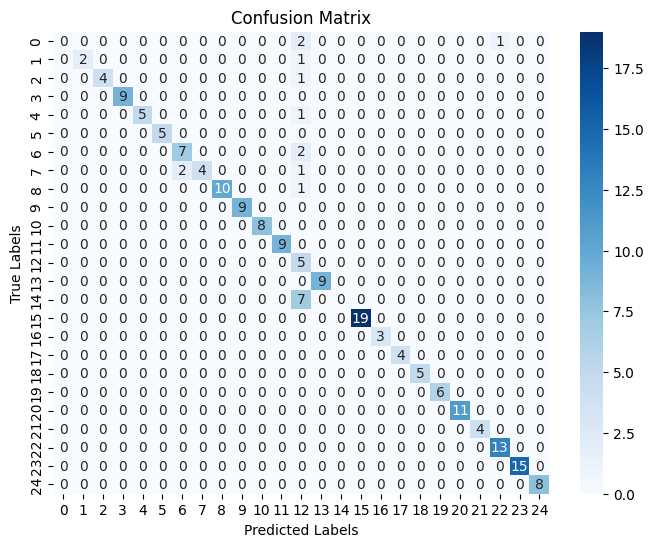

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Entraînement du modèle
clf_knn = OneVsRestClassifier(KNeighborsClassifier())

# Entraînement sur l'ensemble de formation
clf_knn.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_test = clf_knn.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

recall = recall_score(y_test, y_pred_test, average='weighted')

# Calcul de la précision
precision = precision_score(y_test, y_pred_test, average='weighted')

# Calcul de la F-mesure
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Rappel (Recall):", recall)
print("Précision (Precision):", precision)
print("F-mesure (F1-score):", f1)

Rappel (Recall): 0.9015544041450777
Précision (Precision): 0.9132741179373304
F-mesure (F1-score): 0.8979672793144297


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision tree model

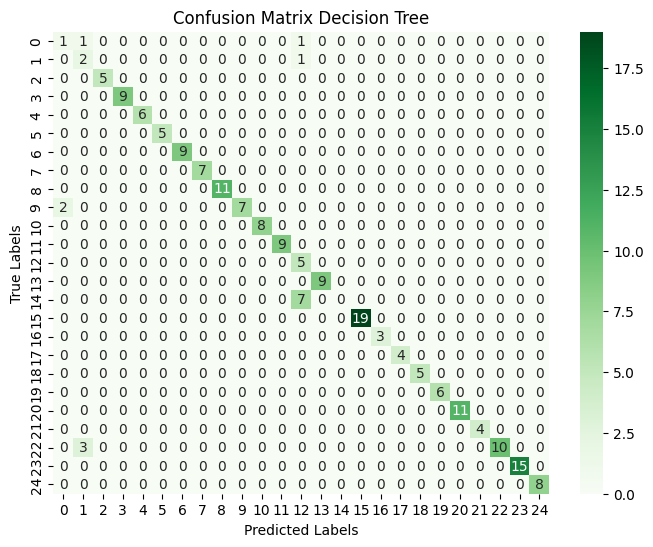

Accuracy: 0.9222797927461139


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialisation du modèle d'arbre de décision
clf_DecisionTree = tree.DecisionTreeClassifier()

# Entraînement du modèle sur l'ensemble de formation
clf_DecisionTree.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
yp = clf_DecisionTree.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, yp)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Decision Tree')
plt.show()

# Calcul de la précision
acc = accuracy_score(y_test, yp)
print("Accuracy:", acc)


In [26]:
# Calcul de la précision
precision = precision_score(y_test, yp, average='weighted')

# Calcul du rappel
recall = recall_score(y_test, yp, average='weighted')

# Calcul de la F-mesure
f1 = f1_score(y_test, yp, average='weighted')

print("Précision (Precision):", precision)
print("Rappel (Recall):", recall)
print("F-mesure (F1-score):", f1)

Précision (Precision): 0.9263508512213176
Rappel (Recall): 0.9222797927461139
F-mesure (F1-score): 0.9178459072890607


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random forest

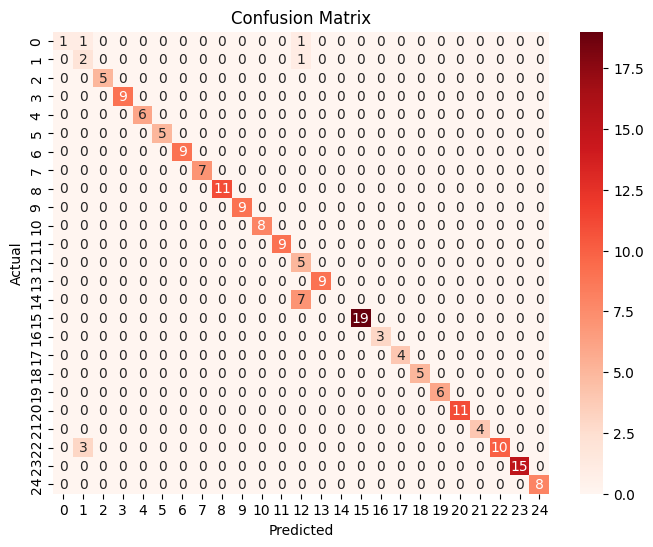

In [27]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
RandomForestClassifier(n_jobs=1)
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calcul de la précision
precision = precision_score(y_test, y_pred, average='weighted')

# Calcul du rappel
recall = recall_score(y_test, y_pred, average='weighted')

# Calcul de la F-mesure
f1 = f1_score(y_test, y_pred, average='weighted')

# Calcul de l'exactitude (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

print("Précision (Precision):", precision)
print("Rappel (Recall):", recall)
print("F-mesure (F1-score):", f1)
print("Exactitude (Accuracy):", accuracy)


Précision (Precision): 0.9367135455218356
Rappel (Recall): 0.9326424870466321
F-mesure (F1-score): 0.9262655964082317
Exactitude (Accuracy): 0.9326424870466321


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9326424870466321


In [30]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of Random forest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Random forest Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Random forest Classifier on training set: 0.96
Accuracy of Random forest Classifier on test set:     0.93


In [31]:
print(clf,metrics.classification_report(y_test,prediction))

RandomForestClassifier()               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      0.67      0.44         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       0.36      1.00      0.53         5
          13       1.00      1.00      1.00         9
          14       0.00      0.00      0.00         7
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00         3
  

c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

XGBOSST

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier


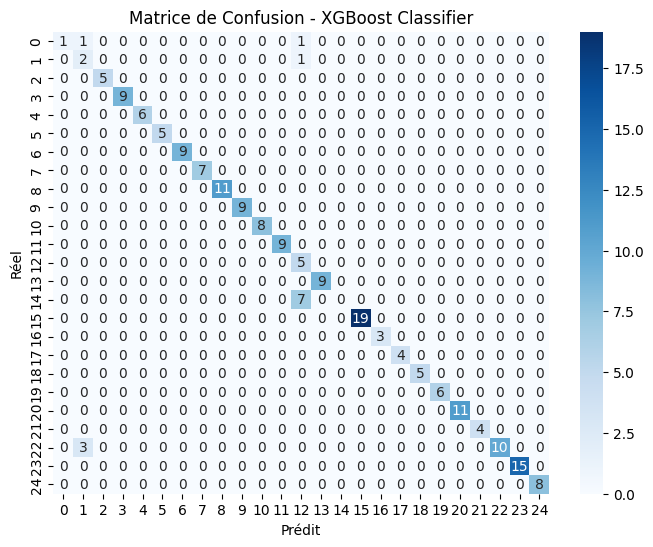

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Créer une instance du classificateur XGBoost
xgb = XGBClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
xgb.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = xgb.predict(X_test)

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - XGBoost Classifier')
plt.show()


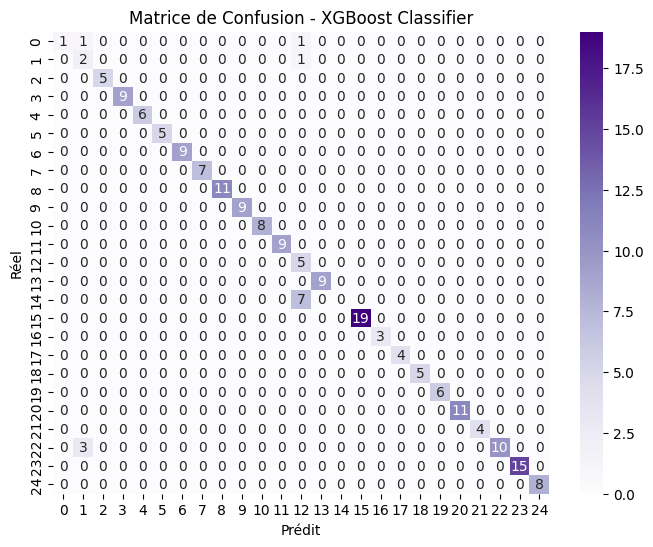

Accuracy: 93.26%


In [34]:
xgb = XGBClassifier()  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - XGBoost Classifier')
plt.show()
# predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculating precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculating recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculating F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)


Precision: 0.9367135455218356
Recall: 0.9326424870466321
F1-score: 0.9262655964082317
Accuracy: 0.9326424870466321


c:\Users\yassi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
